In [147]:
#Import neccessary libraries
import pandas as pd
import numpy as np
import os

In [148]:
# Import packages for data visualization
import matplotlib.pyplot as plt

In [149]:
# This lets us see all of the columns, preventing Jupyter from redacting them.
pd.set_option('display.max_columns', None)

In [150]:
# Import packages for data modeling
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, make_scorer, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.preprocessing import MinMaxScaler

import shap

In [151]:
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

In [152]:
# Import dataset
filepath = os.path.join('..', 'datasets', 'brand_effect_res_cust.csv')
df0 = pd.read_csv(filepath)

In [153]:
# Inspect the first five rows
df0.head()

,customer_id,inductively_brand_aware,spontaneously_brand_aware,brand_distinct,brand_quality,intend_to_buy,reason_try,reason_competition,reason_repeat,reason_premium,reason_superiority,after_purchase_satisfiedness,recommend,brandful,target
0,4279,0.0,1.0,1.0,0.0,0.0,0.0,0.5,1.0,0.0,0.0,1.0,1.0,1.0,2
1,2703,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.0,1
2,5157,0.5,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,2
3,3752,0.0,0.5,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,2
4,5180,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [154]:
# Copy the source df0 dataframe
df = df0.copy()

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   7000 non-null   int64  
 1   inductively_brand_aware       7000 non-null   float64
 2   spontaneously_brand_aware     7000 non-null   float64
 3   brand_distinct                7000 non-null   float64
 4   brand_quality                 7000 non-null   float64
 5   intend_to_buy                 7000 non-null   float64
 6   reason_try                    7000 non-null   float64
 7   reason_competition            7000 non-null   float64
 8   reason_repeat                 7000 non-null   float64
 9   reason_premium                7000 non-null   float64
 10  reason_superiority            7000 non-null   float64
 11  after_purchase_satisfiedness  7000 non-null   float64
 12  recommend                     7000 non-null   float64
 13  bra

In [156]:
df.head(20)

,customer_id,inductively_brand_aware,spontaneously_brand_aware,brand_distinct,brand_quality,intend_to_buy,reason_try,reason_competition,reason_repeat,reason_premium,reason_superiority,after_purchase_satisfiedness,recommend,brandful,target
0,4279,0.0,1.0,1.0,0.0,0.0,0.0,0.5,1.0,0.0,0.0,1.0,1.0,1.0,2
1,2703,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.0,1
2,5157,0.5,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,2
3,3752,0.0,0.5,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,2
4,5180,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
5,3078,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5,1.0,1.0,2
6,4952,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2
7,5912,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2
8,226,1.0,0.5,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.5,1.0,1.0,3
9,2691,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.5,0.0,1.0,0.5,0.0,2


In [157]:
# Drop `ID` column
df = df.drop(columns=['customer_id'])
df.head()

,inductively_brand_aware,spontaneously_brand_aware,brand_distinct,brand_quality,intend_to_buy,reason_try,reason_competition,reason_repeat,reason_premium,reason_superiority,after_purchase_satisfiedness,recommend,brandful,target
0,0.0,1.0,1.0,0.0,0.0,0.0,0.5,1.0,0.0,0.0,1.0,1.0,1.0,2
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.0,1
2,0.5,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,2
3,0.0,0.5,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,2
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [158]:
# Get class balance of 'target' col
df['target'].value_counts()

target
2    4086
3    1662
1    1188
4      32
0      32
Name: count, dtype: int64

In [159]:
# Define number of synthetic samples per class
num_samples_per_class = 300

# Define weight dictionary for the 13 features
feature_weights = {
    "inductively_brand_aware": 0.80, "spontaneously_brand_aware": 0.85, "brand_distinct": 0.78, "brand_quality": 0.82,
    "intend_to_buy": 0.88, "reason_try": 0.65, "reason_competition": 0.70, "reason_repeat": 0.90,
    "reason_premium": 0.45, "reason_superiority": 0.75, "after_purchase_satisfiedness": 0.92, "recommend": 0.85, "brandful": 0.87
}

# Function to compute normalized score
def compute_normalized_score(row):
    row_values = np.array([row[feature] for feature in feature_weights.keys()])
    weight_values = np.array(list(feature_weights.values()))
    return np.dot(row_values, weight_values) / np.sum(weight_values)

# Function to generate synthetic data ensuring exactly 150 samples per class
def generate_synthetic_data(num_samples, low_values, high_values, condition, target_label):
    synthetic_samples = []
    while len(synthetic_samples) < num_samples:
        sample = np.random.choice(low_values if target_label == 0 else high_values, size=(13,))
        normalized_score = np.dot(sample, list(feature_weights.values())) / np.sum(list(feature_weights.values()))
        if condition(normalized_score):
            synthetic_samples.append(list(sample) + [normalized_score, target_label])
    
    # Convert the synthetic_samples list into a pandas DataFrame
    column_names = list(feature_weights.keys()) + ['normalized_score', 'target']
    return pd.DataFrame(synthetic_samples, columns=column_names)

# Generate synthetic data for class 0 (low scores, choose from 0 and 0.5)
synthetic_class_0 = generate_synthetic_data(num_samples_per_class, [0, 0.5], [0.5, 1], lambda x: x < 0.2, 0)
synthetic_class_0["target"] = 0

# Generate synthetic data for class 4 (high scores, choose from 0.5 and 1)
synthetic_class_4 = generate_synthetic_data(num_samples_per_class, [0, 0.5], [0.5, 1], lambda x: x >= 0.8, 4)
synthetic_class_4["target"] = 4

# Merge synthetic samples into dataset
df = pd.concat([df, synthetic_class_0, synthetic_class_4], ignore_index=True)

# Drop temporary score column
df.drop(columns=["normalized_score"], inplace=True)

# Get class balance of 'target' col
df['target'].value_counts()

target
2    4086
3    1662
1    1188
4     332
0     332
Name: count, dtype: int64

In [160]:
# 1. Isolate X variables
X = df.drop(columns=["target"])

# 2. Isolate y variable
y = df["target"]

# 3. Split into train and test sets
X_tr, X_test, y_tr, y_test = train_test_split(X, y, stratify=y, test_size=0.15, random_state=42)

# 4. Split into train and validate sets
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, stratify=y_tr, test_size=0.17, random_state=42)

# Print class distributions
print("Train class distribution:", np.unique(y_train, return_counts=True))
print("Validation class distribution:", np.unique(y_val, return_counts=True))
print("Test class distribution:", np.unique(y_test, return_counts=True))

Train class distribution: (array([0, 1, 2, 3, 4], dtype=int64), array([ 234,  838, 2882, 1173,  234], dtype=int64))
Validation class distribution: (array([0, 1, 2, 3, 4], dtype=int64), array([ 48, 172, 591, 240,  48], dtype=int64))
Test class distribution: (array([0, 1, 2, 3, 4], dtype=int64), array([ 50, 178, 613, 249,  50], dtype=int64))


In [161]:
for x in [X_train, X_val, X_test]:
    print(len(x))

5361
1099
1140


In [162]:
# Min-Max Scaling
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_train = X_train_scaled

X_val_scaled = scaler.transform(X_val)
X_val = X_val_scaled

X_test_scaled = scaler.transform(X_test)
X_test = X_test_scaled

In [163]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [9],
             'max_features': [1.0],
             'max_samples': [1.0],
             'min_samples_leaf': [0.002],
             'min_samples_split': [0.001],
             'n_estimators': [300],
             }

# 3. Define a list of scoring metrics to capture
scoring = {
    'f1_macro': 'f1_macro',
    'f1_weighted': 'f1_weighted',
    'recall_macro': 'recall_macro',
    'roc_auc_ovr': 'roc_auc_ovr'
}

# 4. Define StratifiedKFold for cross-validation
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# 5. Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=skf, n_jobs=-1, refit='roc_auc_ovr')

In [164]:
%%time
rf_cv.fit(X_train, y_train)

CPU times: total: 1.7 s
Wall time: 3.89 s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [9], 'max_features': [1.0],
                         'max_samples': [1.0], 'min_samples_leaf': [0.002],
                         'min_samples_split': [0.001], 'n_estimators': [300]},
             refit='roc_auc_ovr',
             scoring={'f1_macro': 'f1_macro', 'f1_weighted': 'f1_weighted',
                      'recall_macro': 'recall_macro',
                      'roc_auc_ovr': 'roc_auc_ovr'})

In [165]:
# Examine best score
print("roc_auc_ovr=", rf_cv.best_score_)

roc_auc_ovr= 0.9636780958786616


In [166]:
best_rf = rf_cv.best_estimator_

importances = best_rf.feature_importances_

feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance(%)': np.round(importances * 100,2)
}).sort_values(by='Importance(%)', ascending=False)

feature_importance_rf.head(13)

,Feature,Importance(%)
5,reason_try,16.70
3,brand_quality,14.21
10,after_purchase_satisfiedness,9.67
11,recommend,8.76
8,reason_premium,8.55
12,brandful,7.89
0,inductively_brand_aware,7.69
4,intend_to_buy,7.10
1,spontaneously_brand_aware,5.96
2,brand_distinct,5.36


In [167]:
def shap_to_probability_delta(shap_val, base_value=0.0):
    return 1 / (1 + np.exp(-(base_value + shap_val))) - 1 / (1 + np.exp(-base_value))

In [168]:
# Create SHAP explainer
explainer = shap.TreeExplainer(rf_cv.best_estimator_)
shap_values = explainer.shap_values(X_train)  # Get SHAP values for all features

# Extract SHAP values for class 1 (positive class) from shap_values[1]
# This assumes shap_values[1] is of shape (n_samples, n_features) for class 1 (positive class).
shap_values_class_1 = shap_values[:, :, 1]

# Compute the mean SHAP value per feature (across all samples)
mean_shap_values = np.mean(shap_values_class_1, axis=0)  # Mean SHAP value per feature for positive class

# Compute mean absolute SHAP values per feature
mean_abs_shap_values = np.mean(np.abs(shap_values_class_1), axis=0)  # Mean absolute SHAP values per feature

# Direction: 'Increases' if the mean SHAP value for a feature is positive, 'Decreases' otherwise
direction = ['Inc.' if val > 0 else 'Dec.' for val in mean_shap_values]

# Binning the impact into categories (Low, Medium, High) based on quantiles of the mean absolute SHAP values
impact_strength = pd.qcut(mean_abs_shap_values, q=3, labels=["Low", "Medium", "High"])

# Create a DataFrame to summarize the SHAP values for each feature
shap_summary_df = pd.DataFrame({
'Feature': X.columns,  # Features in the dataset
'Imp. %': np.round(shap_to_probability_delta(mean_abs_shap_values)*100, 1),  # Impact percentage for each feature
'Imp. Direct.': direction,  # Impact direction based on mean SHAP values
'Imp. Strength': impact_strength  # Categorized impact strength (Low, Medium, High)
}).sort_values(by=['Imp. Direct.', 'Imp. %'], ascending=False).reset_index(drop=True)

# Save the SHAP summary to Excel for further inspection
shap_summary_df.to_excel('be_res_shap_summary_rf.xlsx', index=False)

# Display the summary DataFrame
shap_summary_df

,Feature,Imp. %,Imp. Direct.,Imp. Strength
0,intend_to_buy,2.2,Inc.,High
1,reason_try,1.8,Inc.,High
2,inductively_brand_aware,1.2,Inc.,Medium
3,after_purchase_satisfiedness,0.8,Inc.,Medium
4,brandful,0.6,Inc.,Medium
5,reason_premium,0.5,Inc.,Low
6,reason_competition,0.4,Inc.,Low
7,reason_superiority,0.2,Inc.,Low
8,reason_repeat,0.1,Inc.,Low
9,recommend,2.1,Dec.,High


In [169]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): f1_macro, f1_weighted, recall_macro or roc_auc

    Returns a pandas df with the f1_macro, f1_weighted, recall_macro, and roc_auc_ovr scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    best_scores = {
        "f1_macro": model_object.cv_results_['mean_test_f1_macro'].max(),
        "f1_weighted": model_object.cv_results_['mean_test_f1_weighted'].max(),
        "recall_macro": model_object.cv_results_['mean_test_recall_macro'].max(),
        "roc_auc_ovr": model_object.cv_results_['mean_test_roc_auc_ovr'].max(),
    }
    
    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                          'f1_macro': best_scores["f1_macro"],
                          'f1_weighted': best_scores["f1_weighted"],
                          'recall_macro': best_scores["recall_macro"],
                          'roc_auc_ovr': best_scores["roc_auc_ovr"]
                          },
                         )

    return table

In [170]:
results = make_results('RF train', rf_cv, 'roc_auc_ovr')
results

,model,f1_macro,f1_weighted,recall_macro,roc_auc_ovr
0,RF train,0.828939,0.801902,0.850764,0.963678


In [171]:
# 1. Instantiate the CatBoost classifier
catboost = CatBoostClassifier(random_seed=42, verbose=0)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {
    'iterations': [500],
    'depth': [4],
    'learning_rate': [0.1],
    'l2_leaf_reg': [3.0],
    'border_count': [32],
    'bagging_temperature': [0.2],
    'random_strength': [1.0],
}

# 3. Define a list of scoring metrics to capture
scoring = {
    'f1_macro': 'f1_macro',
    'f1_weighted': 'f1_weighted',
    'recall_macro': 'recall_macro',
    'roc_auc_ovr': 'roc_auc_ovr'
}

# 4. Define StratifiedKFold for cross-validation
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# 5. Instantiate the GridSearchCV object
catboost_cv = GridSearchCV(catboost, cv_params, scoring=scoring, cv=skf, n_jobs=-1, refit='roc_auc_ovr')

In [172]:
%%time
catboost_cv.fit(X_train, y_train, early_stopping_rounds=50)

CPU times: total: 6.66 s
Wall time: 5.01 s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=<catboost.core.CatBoostClassifier object at 0x00000231699453A0>,
             n_jobs=-1,
             param_grid={'bagging_temperature': [0.2], 'border_count': [32],
                         'depth': [4], 'iterations': [500],
                         'l2_leaf_reg': [3.0], 'learning_rate': [0.1],
                         'random_strength': [1.0]},
             refit='roc_auc_ovr',
             scoring={'f1_macro': 'f1_macro', 'f1_weighted': 'f1_weighted',
                      'recall_macro': 'recall_macro',
                      'roc_auc_ovr': 'roc_auc_ovr'})

In [173]:
# Examine best score
print("roc_auc_ovr=", catboost_cv.best_score_)

roc_auc_ovr= 0.998743380080338


In [174]:
best_catboost = catboost_cv.best_estimator_

importances = best_catboost.feature_importances_

feature_importance_catboost = pd.DataFrame({
    'Feature': X.columns,
    'Importance(%)': np.round(100 * importances / (importances.sum()),2)
}).sort_values(by='Importance(%)', ascending=False)

feature_importance_catboost.head(13)

,Feature,Importance(%)
11,recommend,12.27
4,intend_to_buy,11.78
2,brand_distinct,10.25
0,inductively_brand_aware,9.73
1,spontaneously_brand_aware,9.22
10,after_purchase_satisfiedness,9.02
3,brand_quality,8.18
12,brandful,8.07
6,reason_competition,6.43
8,reason_premium,6.37


In [175]:
# Make sure you're passing the best model from GridSearchCV
best_model = catboost_cv.best_estimator_

# Create SHAP explainer with model_output="probability"
explainer = shap.TreeExplainer(best_model)

# Get SHAP values
shap_values = explainer.shap_values(X_train)

class_values = np.array([1, 2, 3, 4, 5])  # ordinal values of your classes

# Stack shap_values into shape (5, n_samples, n_features)
shap_arr = np.array(shap_values)  # shape: (5, n_samples, n_features)

# Step 1: Multiply SHAP values by class index
# Broadcast (1, 1, 5) * (n_samples, n_features, 5) → (n_samples, n_features, 5)
weighted_shap = shap_arr * class_values

# Step 2: Sum across classes to get a single directional SHAP value per feature per sample
directional_shap = np.sum(weighted_shap, axis=2)  # shape: (n_samples, n_features)

# Step 3: Aggregate across samples
mean_weighted_shap = np.mean(directional_shap, axis=0)             # shape: (n_features,)
mean_abs_weighted_shap = np.mean(np.abs(directional_shap), axis=0) # shape: (n_features,)


# Direction: positive means increasing the feature leads to higher branding score
direction = ['Inc.' if val > 0 else 'Dec.' for val in mean_weighted_shap]

# Impact strength
impact_strength = pd.qcut(mean_abs_weighted_shap, q=3, labels=["Low", "Medium", "High"])

#Create dataframe
shap_summary_df = pd.DataFrame({
    'Feature': X.columns,
    'Imp. %': np.round(mean_abs_weighted_shap / mean_abs_weighted_shap.sum() * 100, 1),
    'Imp. Direct.': direction,
    'Imp. Strength': impact_strength
}).sort_values(by=['Imp. Direct.', 'Imp. %'], ascending=False).reset_index(drop=True)

# Save to disk
shap_summary_df.to_excel('be_res_shap_summary_catboost.xlsx', index=False)

# Display
shap_summary_df

,Feature,Imp. %,Imp. Direct.,Imp. Strength
0,intend_to_buy,11.8,Inc.,High
1,recommend,11.5,Inc.,High
2,after_purchase_satisfiedness,9.4,Inc.,Medium
3,reason_competition,7.1,Inc.,Medium
4,reason_premium,6.0,Inc.,Low
5,reason_superiority,3.2,Inc.,Low
6,reason_repeat,0.1,Inc.,Low
7,brand_distinct,10.9,Dec.,High
8,inductively_brand_aware,10.2,Dec.,High
9,spontaneously_brand_aware,9.2,Dec.,Medium


In [176]:
# Call 'make_results()' on the GridSearch object
catboost_cv_results = make_results('CatBoost train', catboost_cv, 'roc_auc_ovr')
results = pd.concat([results, catboost_cv_results], axis=0)
results

,model,f1_macro,f1_weighted,recall_macro,roc_auc_ovr
0,RF train,0.828939,0.801902,0.850764,0.963678
0,CatBoost train,0.966641,0.969806,0.956758,0.998743


In [177]:
# Use random forest model to predict on validation data
rf_val_preds = rf_cv.best_estimator_.predict(X_val)

In [178]:
def get_test_scores(model_name:str, grid_search_cv, X_val_test, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of f1_macro, f1_weighted, recall_macro, and roc_auc_ovr scores for your model
    '''
       
    y_proba = grid_search_cv.predict_proba(X_val_test)
    
    
    table = pd.DataFrame({'model': [model_name],
                          'f1_macro': f1_score(y_test_data, preds, average='macro'),
                          'f1_weighted': f1_score(y_test_data, preds, average='weighted'),
                          'recall_macro': recall_score(y_test_data, preds, average='macro', zero_division=1),
                          'roc_auc_ovr': roc_auc_score(y_test_data, y_proba, multi_class='ovr', average='macro')
                          },
                         )

    return table

In [179]:
# Get validation scores for RF model
rf_val_scores = get_test_scores('RF val', rf_cv, X_val, rf_val_preds, y_val)

# Append to the results table
results = pd.concat([results, rf_val_scores], axis=0)
results

,model,f1_macro,f1_weighted,recall_macro,roc_auc_ovr
0,RF train,0.828939,0.801902,0.850764,0.963678
0,CatBoost train,0.966641,0.969806,0.956758,0.998743
0,RF val,0.842596,0.802758,0.866670,0.966572


In [180]:
# Use CatBoost model to predict on validation data
catboost_val_preds = catboost_cv.best_estimator_.predict(X_val)

In [181]:
# Get validation scores for XGBoost model
catboost_val_scores = get_test_scores('CatBoost val', catboost_cv, X_val, catboost_val_preds, y_val)

# Append to the results table
results = pd.concat([results, catboost_val_scores], axis=0)
results

,model,f1_macro,f1_weighted,recall_macro,roc_auc_ovr
0,RF train,0.828939,0.801902,0.850764,0.963678
0,CatBoost train,0.966641,0.969806,0.956758,0.998743
0,RF val,0.842596,0.802758,0.866670,0.966572
0,CatBoost val,0.980306,0.978981,0.971532,0.999393


In [182]:
# Use Random Forest model to predict on test data
rf_test_preds = rf_cv.best_estimator_.predict(X_test)

# Get test scores for Random Forest model
rf_test_scores = get_test_scores('RF test', rf_cv, X_test, rf_test_preds, y_test)

# Append to the results table
results = pd.concat([results, rf_test_scores], axis=0)
results

,model,f1_macro,f1_weighted,recall_macro,roc_auc_ovr
0,RF train,0.828939,0.801902,0.850764,0.963678
0,CatBoost train,0.966641,0.969806,0.956758,0.998743
0,RF val,0.842596,0.802758,0.866670,0.966572
0,CatBoost val,0.980306,0.978981,0.971532,0.999393
0,RF test,0.835845,0.801626,0.862488,0.964004


In [183]:
# Use CatBoost model to predict on test data
catboost_test_preds = catboost_cv.best_estimator_.predict(X_test)

# Get test scores for CatBoost model
catboost_test_scores = get_test_scores('CatBoost test', catboost_cv, X_test, catboost_test_preds, y_test)

# Append to the results table
results = pd.concat([results, catboost_test_scores], axis=0)
results.to_excel('be_res_rf_catboost_scores.xlsx', index=False)
results

,model,f1_macro,f1_weighted,recall_macro,roc_auc_ovr
0,RF train,0.828939,0.801902,0.850764,0.963678
0,CatBoost train,0.966641,0.969806,0.956758,0.998743
0,RF val,0.842596,0.802758,0.866670,0.966572
0,CatBoost val,0.980306,0.978981,0.971532,0.999393
0,RF test,0.835845,0.801626,0.862488,0.964004
0,CatBoost test,0.979805,0.978849,0.973823,0.999062


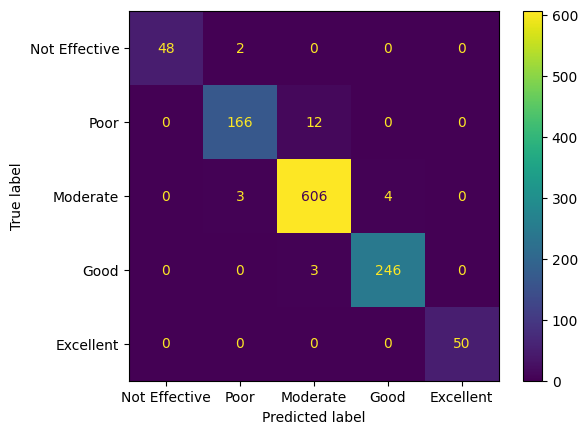

In [184]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, catboost_test_preds, labels=catboost_cv.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['Not Effective', 'Poor', 'Moderate', 'Good', 'Excellent'])
disp.plot();